In [5]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
train_data=pd.read_excel('D:\Projects\Project_1-airline_fare/Data_Train.xlsx')

In [7]:
train_data.head()
#train_data.shape

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


# DATA PREPROCESSING

In [8]:

train_data.isna().sum()


Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [9]:
train_data.dropna(inplace=True)

In [10]:
train_data.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [11]:
train_data.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

In [12]:
# A function which converts our columns into date-time format  
def change_into_datetime(col):
    train_data[col]=pd.to_datetime(train_data[col])

In [13]:
train_data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [14]:
for i in ['Date_of_Journey','Dep_Time', 'Arrival_Time']:
         change_into_datetime(i)

In [15]:
train_data.dtypes

Airline                    object
Date_of_Journey    datetime64[ns]
Source                     object
Destination                object
Route                      object
Dep_Time           datetime64[ns]
Arrival_Time       datetime64[ns]
Duration                   object
Total_Stops                object
Additional_Info            object
Price                       int64
dtype: object

In [16]:
train_data['journey_day']=train_data['Date_of_Journey'].dt.day
train_data['Journey_month']=train_data['Date_of_Journey'].dt.month

train_data.drop("Date_of_Journey",axis=1, inplace=True)

In [17]:
#IN TIME some COLUMS WE NEED TO SPECIFY HOURS AND MINUTES
def extract_hour(df,col):
    df[col+'_hour']=df[col].dt.hour
def extract_min(df,col):
    df[col+'_hour']=df[col].dt.minute
def drop_column(df,col):
    df.drop(col,axis=1,inplace=True)

In [18]:
extract_hour(train_data,'Dep_Time')
extract_min(train_data,'Dep_Time')
drop_column(train_data,'Dep_Time')

In [19]:
extract_hour(train_data,'Arrival_Time')
extract_min(train_data,'Arrival_Time')
drop_column(train_data,'Arrival_Time')

In [20]:
duration=list(train_data["Duration"])


In [21]:
x='2h 50m'
len(x.split(" "))

2

In [22]:
for i in range(len(duration)):
    if len(duration[i].split(" "))==2:
        pass
    else:
        if 'h' in duration[i]:
            duration[i]=duration[i]+" "+"0m"
            
        else:
          duration[i]="0h"+" "+duration[i]
        
            

In [23]:
train_data["Duration"]=duration

In [24]:
train_data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey_day,Journey_month,Dep_Time_hour,Arrival_Time_hour
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,20,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,50,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,6,9,25,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,12,5,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,3,1,50,35


In [25]:
'20h 50m'.split(" ")[0][0:-1]

'20'

In [26]:
def hour(x):
    return x.split(" ")[0][:-1]
def minute(x):
    return x.split(" ")[1][:-1]

In [27]:
train_data["Duration_hours"]=train_data["Duration"].apply(hour)
train_data["Duration_minute"]=train_data["Duration"].apply(minute)
train_data.drop("Duration",axis=1,inplace=True)

In [28]:
train_data.dtypes

Airline              object
Source               object
Destination          object
Route                object
Total_Stops          object
Additional_Info      object
Price                 int64
journey_day           int64
Journey_month         int64
Dep_Time_hour         int64
Arrival_Time_hour     int64
Duration_hours       object
Duration_minute      object
dtype: object

In [29]:
train_data.dtypes

Airline              object
Source               object
Destination          object
Route                object
Total_Stops          object
Additional_Info      object
Price                 int64
journey_day           int64
Journey_month         int64
Dep_Time_hour         int64
Arrival_Time_hour     int64
Duration_hours       object
Duration_minute      object
dtype: object

In [30]:
train_data["Duration_hours"]=train_data["Duration_hours"].astype(int)
train_data["Duration_minute"]=train_data["Duration_minute"].astype(int)

In [31]:
train_data.dtypes

Airline              object
Source               object
Destination          object
Route                object
Total_Stops          object
Additional_Info      object
Price                 int64
journey_day           int64
Journey_month         int64
Dep_Time_hour         int64
Arrival_Time_hour     int64
Duration_hours        int32
Duration_minute       int32
dtype: object

In [32]:
cat_col=[col for col in train_data.columns if train_data[col].dtype=="O"]
cat_col


['Airline', 'Source', 'Destination', 'Route', 'Total_Stops', 'Additional_Info']

In [33]:
num_col=[col for col in train_data.columns if train_data[col].dtype!="O"]
num_col


['Price',
 'journey_day',
 'Journey_month',
 'Dep_Time_hour',
 'Arrival_Time_hour',
 'Duration_hours',
 'Duration_minute']

In [34]:
#Categorical data and feature encoding 
categorical=train_data[cat_col]

In [35]:
categorical.head(1)

,Airline,Source,Destination,Route,Total_Stops,Additional_Info
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info


In [36]:
categorical["Destination"].value_counts()

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

In [37]:
#plot distribution of Airlines vs price
#plot distribution of Source vs price
#plot distribution of Destination vs price

<AxesSubplot:xlabel='Airline', ylabel='Price'>

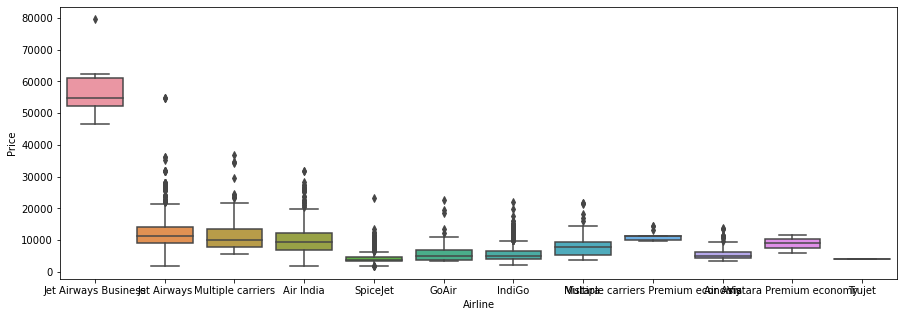

In [38]:
plt.figure(figsize=(15,5))
sns.boxplot(x="Airline",y="Price",data=train_data.sort_values("Price",ascending=False))

<AxesSubplot:xlabel='Source', ylabel='Price'>

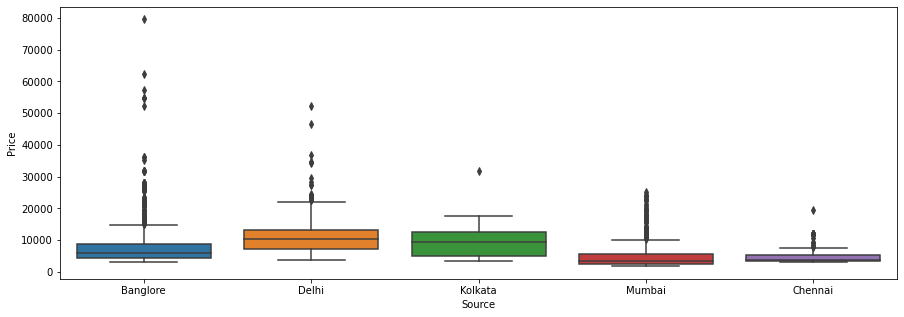

In [39]:
plt.figure(figsize=(15,5))
sns.boxplot(x="Source",y="Price",data=train_data.sort_values("Price",ascending=False))

<AxesSubplot:xlabel='Destination', ylabel='Price'>

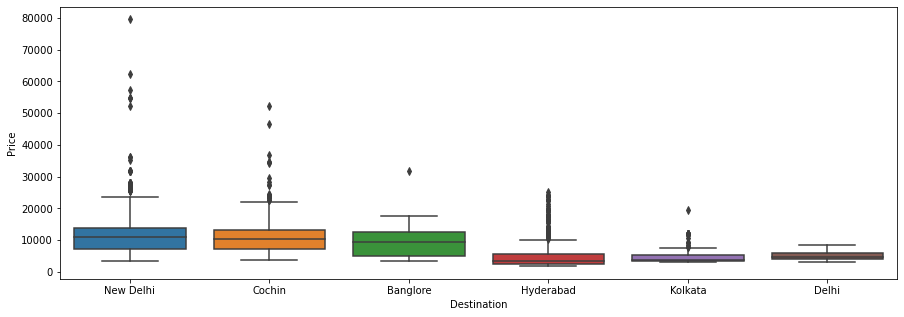

In [40]:
plt.figure(figsize=(15,5))
sns.boxplot(x="Destination",y="Price",data=train_data.sort_values("Price",ascending=False))

In [41]:
#here we have created new dummy dataframe of encoded values
Airline=pd.get_dummies(categorical["Airline"],drop_first=True)
Source=pd.get_dummies(categorical["Source"],drop_first=True)
Destination=pd.get_dummies(categorical["Destination"],drop_first=True)

In [42]:
categorical['Route1']=categorical['Route'].str.split('→').str[0]
categorical['Route2']=categorical['Route'].str.split('→').str[1]
categorical['Route3']=categorical['Route'].str.split('→').str[2]
categorical['Route4']=categorical['Route'].str.split('→').str[3]
categorical['Route5']=categorical['Route'].str.split('→').str[4]


In [43]:
categorical.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Route1,Route2,Route3,Route4,Route5
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,BLR,DEL,NaN,NaN,NaN
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,CCU,IXR,BBI,BLR,NaN
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,DEL,LKO,BOM,COK,NaN
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,CCU,NAG,BLR,NaN,NaN
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,BLR,NAG,DEL,NaN,NaN


In [44]:
drop_column(categorical,"Route")

In [45]:
categorical.isna().sum()

Airline                0
Source                 0
Destination            0
Total_Stops            0
Additional_Info        0
Route1                 0
Route2                 0
Route3              3491
Route4              9116
Route5             10636
dtype: int64

In [46]:
categorical.columns

Index(['Airline', 'Source', 'Destination', 'Total_Stops', 'Additional_Info',
       'Route1', 'Route2', 'Route3', 'Route4', 'Route5'],
      dtype='object')

In [47]:
for i in ['Route3', 'Route4', 'Route5']:
    categorical[i].fillna('None',inplace=True)
    

In [48]:
#label encode
from sklearn.preprocessing import LabelEncoder

In [49]:
encoder=LabelEncoder()


In [50]:
for i in ['Route1', 'Route2', 'Route3', 'Route4', 'Route5']:
    categorical[i]=encoder.fit_transform(categorical[i])

In [51]:
categorical.drop("Additional_Info", axis=1, inplace=True)

In [52]:
categorical.head()

,Airline,Source,Destination,Total_Stops,Route1,Route2,Route3,Route4,Route5
0,IndiGo,Banglore,New Delhi,non-stop,0,13,29,13,5
1,Air India,Kolkata,Banglore,2 stops,2,25,1,3,5
2,Jet Airways,Delhi,Cochin,2 stops,3,32,4,5,5
3,IndiGo,Kolkata,Banglore,1 stop,2,34,3,13,5
4,IndiGo,Banglore,New Delhi,1 stop,0,34,8,13,5


In [53]:
dict={"non-stop":0, "1 stop":1, "2 stops":2, "3 stops":3, "4 stops":4}


In [54]:
categorical["Total_Stops"]=categorical["Total_Stops"].map(dict)

In [55]:
categorical.head()

,Airline,Source,Destination,Total_Stops,Route1,Route2,Route3,Route4,Route5
0,IndiGo,Banglore,New Delhi,0,0,13,29,13,5
1,Air India,Kolkata,Banglore,2,2,25,1,3,5
2,Jet Airways,Delhi,Cochin,2,3,32,4,5,5
3,IndiGo,Kolkata,Banglore,1,2,34,3,13,5
4,IndiGo,Banglore,New Delhi,1,0,34,8,13,5


In [56]:
#concat our new made dataframes into our main dataframe
data_train=pd.concat([categorical,Airline,Source,Destination,train_data[num_col]],axis=1)

In [57]:
data_train.drop("Airline",axis=1,inplace=True)
data_train.drop("Destination",axis=1,inplace=True)
data_train.drop("Source",axis=1,inplace=True)

In [58]:
data_train.head()

,Total_Stops,Route1,Route2,Route3,Route4,Route5,Air India,GoAir,IndiGo,Jet Airways,...,Hyderabad,Kolkata,New Delhi,Price,journey_day,Journey_month,Dep_Time_hour,Arrival_Time_hour,Duration_hours,Duration_minute
0,0,0,13,29,13,5,0,0,1,0,...,0,0,1,3897,24,3,20,10,2,50
1,2,2,25,1,3,5,1,0,0,0,...,0,0,0,7662,5,1,50,15,7,25
2,2,3,32,4,5,5,0,0,0,1,...,0,0,0,13882,6,9,25,25,19,0
3,1,2,34,3,13,5,0,0,1,0,...,0,0,0,6218,5,12,5,30,5,25
4,1,0,34,8,13,5,0,0,1,0,...,0,0,1,13302,3,1,50,35,4,45


#finding outliers and their imputation

<AxesSubplot:xlabel='Price'>

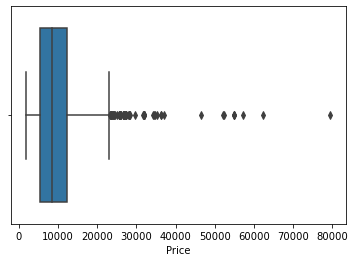

In [59]:
sns.boxplot(data_train["Price"])

In [60]:
data_train["Price"]=np.where(data_train["Price"]>=4000,data_train["Price"].median(),data_train["Price"])

In [61]:
#seperate indepandent and dependent features#
x=data_train.drop("Price",axis=1)
y=data_train["Price"]

In [62]:
#Feature selection : which vaiable contributes most to our prediction !!
from sklearn.feature_selection import mutual_info_classif
mutual_info_classif(x,y)

array([0.13867492, 0.29885602, 0.34203264, 0.17916885, 0.07225163,
       0.02471551, 0.03219893, 0.02320193, 0.07868078, 0.06880616,
       0.00042899, 0.01083517, 0.        , 0.15091096, 0.00385466,
       0.01706419, 0.        , 0.09063927, 0.06152844, 0.06170336,
       0.13587663, 0.06011205, 0.07232187, 0.13696835, 0.09030324,
       0.00791034, 0.02537285, 0.03077951, 0.13373385, 0.13825119,
       0.27152828, 0.16517978])

In [63]:
imp=pd.DataFrame(mutual_info_classif(x,y),index=x.columns)

In [64]:
imp.columns=["importance"]
imp.sort_values(by='importance', ascending=False)

,importance
Route2,0.332935
Route1,0.306506
Duration_hours,0.273976
Route3,0.181213
Duration_minute,0.165069
SpiceJet,0.147580
Arrival_Time_hour,0.146268
Hyderabad,0.143153
Mumbai,0.142823
Total_Stops,0.142645


In [65]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
import pickle

In [66]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [67]:
def predict(ml_model,dump):
    model=ml_model.fit(x_train, y_train)
    model.score(x_train,y_train)
    y_pred=model.predict(x_test)
    print("predictions:", y_pred) 
    print("MAE:", metrics.r2_score(y_test,y_pred))
    print("MSE:", metrics.r2_score(y_test,y_pred))
    print("RMSE:", np.sqrt(metrics.r2_score(y_test,y_pred)))
    sns.distplot(y_test-y_pred)
    
    if dump==1:
        file=open('model.pkl', 'wb')
        pickle.dump(model,file)

In [68]:
from sklearn.ensemble import RandomForestRegressor

predictions: [8372. 8372. 8372. ... 8372. 8372. 8372.]
MAE: 0.7358934463356821
MSE: 0.7358934463356821
RMSE: 0.8578423202055737


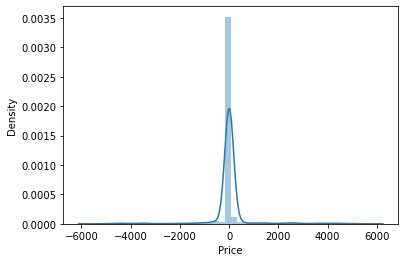

In [69]:
predict(RandomForestRegressor(),1)

In [70]:
import os
os.listdir()
os.getcwd()

'C:\\Users\\91744'

In [71]:
#HYPERPARAMETER TUNING#
from sklearn.model_selection import RandomizedSearchCV


In [72]:
n_estimators= [int(x)for x in np.linspace(start=100,stop=1200,num=6)]

In [73]:
max_depth= [int(x)for x in np.linspace(start=5,stop=30,num=4)]

In [74]:
randomgrid={
    "n_estimators":n_estimators,
    "max_features":['auto','sqrt'],
    "max_depth":max_depth,
    "min_samples_split":[5,10,15,100]
}

In [75]:
rf_random=RandomizedSearchCV(estimator=RandomForestRegressor(),param_distributions=randomgrid,cv=5,verbose=2, n_jobs=-1)

In [76]:
rf_random.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'max_depth': [5, 13, 21, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_split': [5, 10, 15, 100],
                                        'n_estimators': [100, 320, 540, 760,
                                                         980, 1200]},
                   verbose=2)

In [77]:
rf_random.best_params_

{'n_estimators': 320,
 'min_samples_split': 5,
 'max_features': 'sqrt',
 'max_depth': 21}

In [78]:
y_predictfinal=rf_random.predict(x_test)

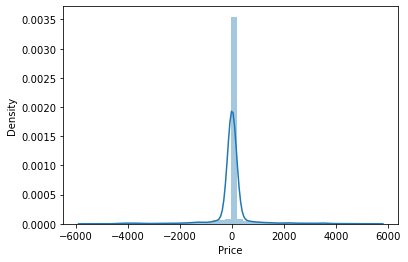

In [79]:
sns.distplot(y_test-y_predictfinal);

In [80]:
metrics.r2_score(y_test,y_predictfinal)

0.7554208979753032